## Проект по информатике (Набережная Елизавета, Обухова Анастасия, Гуменная Яна)

#  1. Kiva и ее деятельность
***


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Kiva.org_logo_2016.svg/640px-Kiva.org_logo_2016.svg.png" width="500" height="200" />

Kiva - это некоммерческая организация, которая позволяет нуждающимся более чем в 80 странах мира получать финансирование под различного рода проекты и нужды.

Девиз Kiva - **Make a loan, change a life**

В основном деятельность Kiva связана с поддержкой населения, развитием малого бизнеса, а также финансированием социальных проектов. 
Список заявок, назанчений и стран, нуждающихся в финансировании можно посмотреть на сайте [kiva.org](https://www.kiva.org).
Это темы, так или иначе связанные с Сельским хозяйством, Питанием, Здоровьем и гигиеной, Розничной торговлей и поддержкой малого бизнеса.

## 1.1. Kiva в цифрах
***

**На сегодняшний день Kiva профинансировала более 1 миллиарда долларов для 2 миллионов заемщиков и считается одним из главных участников борьбы с бедностью, особенно во многих африканских странах.**

* За время существования Кива помогла 2,7 млн нуждающимся
* 1,7 млн. небезразличных участников, желающих помочь
* 83 страны
* Сумма средств, финансируемых через Kiva, составляет $1,11 млрд.
* 97,0% - доля возврата средств инвесторам (очень высокий показатель)
* 81% заемщиков Kiva - женщины
* Кредит Kiva финансируется каждые 2 минуты



## 1.2. Как работает Kiva
***

<img src="https://miro.medium.com/max/1400/1*I-5sWkHtvaSSkYfCs-PptA.png" width="1024" height="737" />

## 1.3. Постановка задачи
***

Kiva хочет сделать так, чтобы собранные деньги тратились с максимальной пользой. В первую очередь, конечно же, их интересуют не статистические показатели, а ощутимые выводы и рекомендации, которые позволят им работать эффективнее и больше понимать специфику потребностей и уровень бедности в разных странах и регионах. 

#### Составим алгоритм данного исследования:
- Проверим, насколько имеющиеся данные чисты, то есть подвержены выбросам, пропущенным и недействительным значениям.
- Ознакомимся с датасетом, изучим его базовые характеристики, выявим первоначальные зависимости.
- Изучим основные демографические характеристики людей, которые используют Kiva. Поймем, из каких они регионов и стран, какова гендерная характеристика заемщиков.
- Посмотрим, для каких целей людям нужны средства и какие суммы они просят. Изучим сектора экономики, виды деятельности и сделаем выводы о том, как обстоят дела в каждом из них.
- Проанализируем, как долго заемщикам приходится ждать полного финансирования заявки.
- Попробуем изучить природу зависимости времени, требуемого на погашение ссуды и суммы кредита.
- Сформулируем основные выводы и визуальные материалы, подкрепляющие их.


## 1.4. Базы данных компании Kiva
***

**kiva_loans** - это набор данных, который содержит большую часть информации о займах:
- id - Уникальный идентификатор для кредита
- funded_amount - Сумма, выплаченная Kiva агенту на местах (USD)
- loan_amount - Сумма, выплаченная полевым агентом заемщику (USD)
- sector - Сектор использования займа
- activity - Более гранулированная категория
- use - Назначение использования суммы кредита
- country_code - ISO код страны страны, в которой был выдан заем
- country - Полное название страны, в которой был выдан кредит
- posted_time - Время, в которое заявка была опубликована на Kiva
- disbursed_time - Время, когда кредитный агент выдал заемщику сумму
- funded_time - Время, когда заявка полностью финансируется кредиторами
- term_in_months - Срок, на который был выдан кредит в месяцах
- lender_count - Общее количество кредиторов, которые внесли свой вклад в этот кредит
- loaner_genders - Разделенные запятыми буквы M, F, где каждый экземпляр представляет одного мужчину / женщину в группе

**kiva_mpi_region_locations** - набор данных, содержащий данные о регинах и показатели MPI:
(Global Multidimensional Poverty Index - глобальный индекс бедности) ряда регионов (субнациональных) в мире.  Чем больше это значение, тем выше бедность в соответствующем регионе 
- country - страна
- region - регион в стране
- world_region - часть света
- MPI - многомерный индекс бедности
- geo - координаты (широта, долгота)



# 2. Разведочный анализ данных
***

## 2.1. Импорт данных и первое знакомство с датасетом
***
Датасеты:
*  df_mpi
*  df_kiva_loans 


Импортируем необходимые библиотеки и загрузим предоставленные наборы данных:

In [13]:
# Импорт библиотек

import numpy as np
import pandas as pd
import math
import missingno as msno
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

import os

import warnings
warnings.filterwarnings("ignore")  

In [2]:
df_kiva_loans = pd.read_csv("C:/Users/gunen/OneDrive/Рабочий стол/инфа/Проект/kiva_loans.csv", parse_dates=['posted_time', 'disbursed_time', 'funded_time'])
df_mpi = pd.read_csv("C:/Users/gunen/OneDrive/Рабочий стол/инфа/Проект/kiva_mpi_region_locations.csv")

Для начала наша задача состоит в том, чтобы взглянуть на небольшой кусочек предоставленных данных:

In [4]:
df_mpi.head(5)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [5]:
df_kiva_loans.head(5)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


Посмотрим на наличие пропущенных значений, чтобы не столкнуться с неприятными сюрпризами при дальнейшей работе:

<AxesSubplot:>

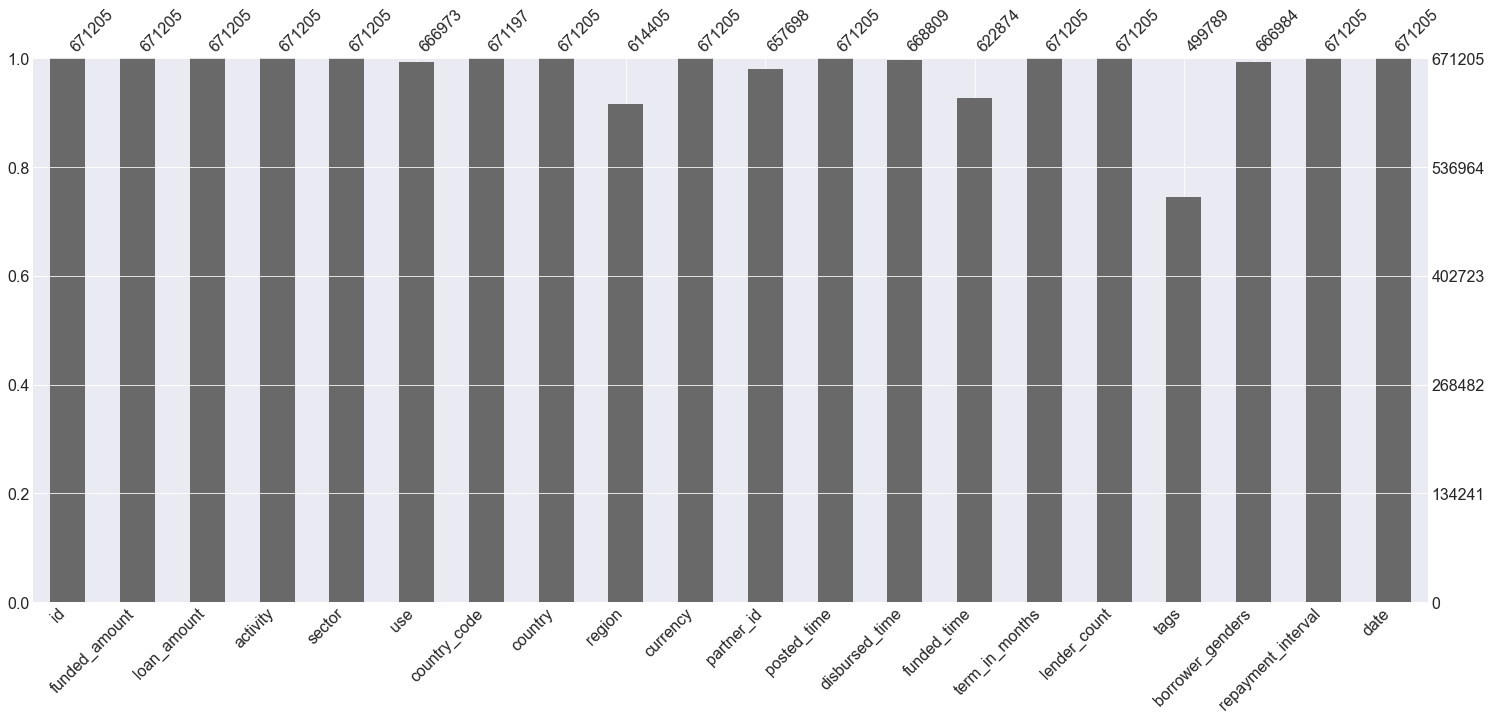

In [6]:
msno.bar(df_kiva_loans)

<AxesSubplot:>

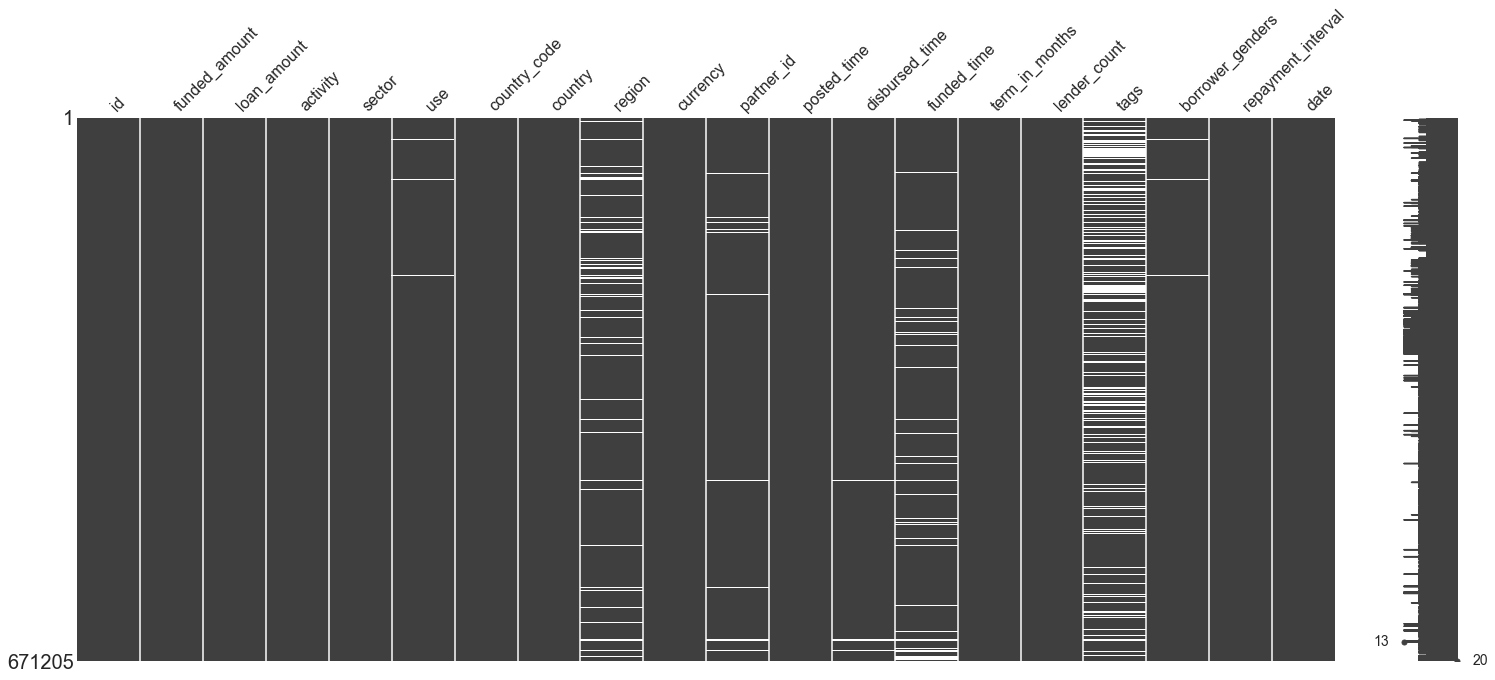

In [7]:
msno.matrix(df_kiva_loans)

Столбец тегов содержит много пропущенных значений. Также столбец с датой, когда запрашиваемая сумма была собрана на платформе Kiva, имеет около 8% пропусков. Это может означать либо то, что сумма пока не собрана, либо то, что она не была отражена в выгрузке корректно.

Следующим шагом приступим к изучению каждого атрибута датасета по отдельности и выведем ряд статистик для каждого из них:

In [8]:
df_kiva_loans.dtypes

id                                  int64
funded_amount                     float64
loan_amount                       float64
activity                           object
sector                             object
use                                object
country_code                       object
country                            object
region                             object
currency                           object
partner_id                        float64
posted_time           datetime64[ns, UTC]
disbursed_time        datetime64[ns, UTC]
funded_time           datetime64[ns, UTC]
term_in_months                    float64
lender_count                        int64
tags                               object
borrower_genders                   object
repayment_interval                 object
date                               object
dtype: object

In [9]:
df_kiva_loans.describe(include=[np.number])

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [14]:
df_kiva_loans.describe(include=[np.object])

,activity,sector,use,country_code,country,region,currency,tags,borrower_genders,repayment_interval,date
count,671205,671205,666973,671197,671205,614405,671205,499789,666984,671205,671205
unique,163,15,424912,86,87,12695,67,86719,11298,4,1298
top,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,user_favorite,female,monthly,2017-03-20
freq,72955,180302,5217,160441,160441,10000,160440,27088,426502,342717,1308


**Первые очевидные результаты и выводы, которые можно сделать:**
* В этом датасете содержатся данные о **87** странах, где люди запрашивали помощь на финансирование проектов.
* Страной с самым большим количеством займов являются **Филиппины**.
* Наиболее популярной категорией является **Сельское хозяйство**.
* Довольно широкий разброс значений по ряду числовых атрибутов, таких как, например, сумма займа, срок погашения кредита.
* В этом наборе данных **11298** разных значений пола! Очевидно, это невозможно. Надо будет обязательно попытаться понять, почему у нас такой набор значений.
* Среднее финансирование в мире составляет **786** долларов, а медианное финансирование - **450** долларов. Возможно это означает, что есть небольшая доля заявок с крупными суммами. Стоит попытаться понять, кому и на какие нужды могли понадобиться такие суммы, а также то, насколько быстро деньги попали к заявителю после публикации заявки.
* Что еще более важно: есть только **1298** различных дат, в которые были опубликованы заявки на кредиты. Если мы подсчитаем соотношение, то это означает, что в Kiva ежедневно выдается более **500** займов. Это дает нам четкое представление о том, насколько важна эта платформа и какое влияние она оказывает.
